<a href="https://colab.research.google.com/github/Ali-mohammadi-design/PyTorch_for_medical_images/blob/main/ANN_Mnist_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

**Downloading Mnist dataset and convert it to a tensor**

In [7]:
transform= transforms.ToTensor()

Input: transforms.ToTensor() takes an image as input, typically in the form of a PIL.Image or a NumPy array.


Output: It converts the image into a PyTorch tensor.


Normalization: Additionally, it scales the pixel values from the range [0, 255] (for 8-bit images) to the range [0, 1], which is a floating-point range.

In [8]:
train_data=datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8562843.03it/s] 


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1782849.27it/s]

Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13478721.17it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7318681.82it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [9]:
test_data=datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Note: As is clear the first element has 28 X 28 data that some of them are 0 and some other have values between 0 to 1. The next element is the label of the picture. In this case it is 5.

In [13]:
type(train_data[0])

tuple

In [19]:
image, label=train_data[0]

In [20]:
image.shape

torch.Size([1, 28, 28])

As is clear it is 28 X 28. The 1 is for the color. Mnist only has 1 channel for the color.

In [21]:
label

5

Note: to show the image by plt.imshow() we need the image just be on a 28X28 without the color channels

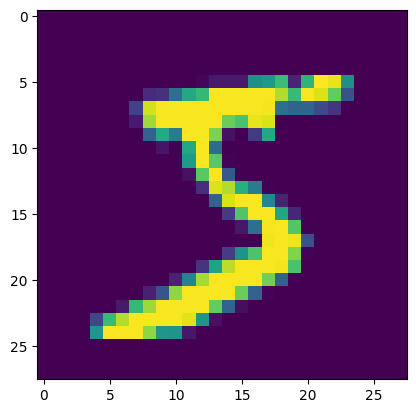

In [23]:
plt.imshow(image.reshape(28,28))

**How to load baches in to the dataloader**

We have 60000 data for training the machine. we can send the data with batches.

By dividing the data into smaller batches, the neural network can process the data more quickly and make better use of its computational resources. This can significantly reduce the time it takes to train the network.

In [24]:
torch.manual_seed(101)
#have the same shuffling

train_loader=DataLoader(train_data, batch_size=100, shuffle=True)
#Sometimes the data set is sorted so we would shuffle to have a general dataset.

test_loader=DataLoader(test_data, batch_size=500, shuffle=False)

**Create a Model**

In [25]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,in_sz=28*28, out_sz=10, layers=[120,84]):
    super().__init__()
    self.fc1=nn.Linear(in_sz, layers[0])
    self.fc2=nn.Linear(layers[0],layers[1])
    self.fc3=nn.Linear(layers[1],out_sz)

  def forward(self,X):
    X=f.relu(self.fc1(X)),
    X=f.relu(self.fc2(X)),
    X=self.fc3(X)

    return f.log_softmax(X,dim=1) #multi class classification




class MultilayerPerceptron:

This line defines a new class (a template or blueprint for creating objects). The name MultilayerPerceptron is the name you’re giving to this blueprint. You can create multiple instances (individual neural networks) based on this blueprint.
(nn.Module):

The nn.Module part means that the MultilayerPerceptron class is a special kind of class that inherits from PyTorch’s nn.Module class.
nn.Module is a base class for all neural network modules in PyTorch. It provides a lot of functionality that is useful for building and training neural networks, such as methods for defining layers, handling weights, and passing data through the network.

__init__:

This line defines a special method called __init__. It runs when you create an instance of your MultilayerPerceptron class.

in_sz=28*28: This sets the size of the input (e.g., an image with 28x28 pixels, like in the MNIST dataset).


out_sz=10: This sets the number of output classes (e.g., 10 digits: 0-9).
layers=[120, 84]: This is a list that specifies the sizes of two hidden layers in the network.


Analogy: When you create your robot, you decide it will handle images of a certain size, recognize a certain number of objects, and have a specific number of parts (layers) to process the information.

super().__init__()

This line calls the __init__ method of the parent class nn.Module. It ensures that the robot is set up correctly according to the basic blueprint provided by nn.Module.


Analogy: You are telling your robot to inherit all the basic functionalities of other robots of its kind, just like inheriting traits from your parents.

 Defining the First Layer: self.fc1 = nn.Linear(in_sz, layers[0])

 This line creates the first fully connected layer, which takes the input (e.g., an image) and outputs to the first hidden layer with 120 neurons.


Analogy: Imagine the first part of the robot’s brain that processes the input signals (like vision) and passes the processed information to the next part.



Defining the Second Layer: self.fc2 = nn.Linear(layers[0], layers[1])

This line creates the second fully connected layer, which takes the output from the first layer (120 neurons) and passes it to the second hidden layer with 84 neurons.
Analogy: The robot processes the information further in another part of its brain, refining the signals to prepare for decision-making.

Defining the Third (Output) Layer: self.fc3 = nn.Linear(layers[1], out_sz)

This line creates the third fully connected layer, which takes the output from the second hidden layer (84 neurons) and produces the final output (10 classes).


Analogy: This is the final part of the robot’s brain where it decides what the input was (like deciding which number it saw).

Forward Method Definition: def forward(self, X):

This line defines how the data (input) flows through the network (from one layer to another).
Analogy: It’s like describing the path information takes as it travels through the robot’s brain.

First Layer Activation: X = f.relu(self.fc1(X))

This line sends the input through the first layer, then applies the ReLU activation function (which adds non-linearity, making the model more powerful).
Analogy: The robot processes the input and transforms it to focus only on the most important signals, ignoring weak ones (like ignoring noise in an image).

Applying Softmax for Multi-Class Classification: return f.log_softmax(X, dim=1)

This line applies the log_softmax function to the output. It converts the raw scores into probabilities (between 0 and 1) for each class and takes the logarithm.

Analogy: The robot now calculates the chances of its prediction being each possible class (e.g., how confident it is that the image is a "7" versus a "3").


In [26]:
torch.manual_seed(101)
model=MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
criterion=nn.CrossEntropyLoss()

In [29]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001 )

**Data Flatenning to be used in ANN**

With .view()
